# Movie Recommender System using Item-Based Collaborative Filter

Movie Recommender System are widely used on streaming platforms like Netflix etc. Not only for movies, but recommendor systems are also used in recommending products to users on Amazon and such platforms. Even music recommendations are a part of our daily life. Recommendor systems are widespread and a part of our lives. 

I implement a simple movie recommendor system in this notebook. I use the Item-based Collaborative Filter approach in this. The dataset used can be found at https://grouplens.org/datasets/movielens/100k/ 

The dataset contains 100k movie reviews given by users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Load reviews dataset

In [2]:
movie_titles = pd.read_csv("movie_titles.csv")
movie_ratings = pd.read_csv('movie_ratings.data', sep='\t', names=['user_id', 'item_id', 'rating', 'date'])

In [3]:
movie_titles.shape

(1682, 2)

In [4]:
movie_titles.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [5]:
movie_ratings.shape

(100003, 4)

In [6]:
movie_ratings.tail()

,user_id,item_id,rating,date
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156
100002,12,203,3,879959583


In [7]:
#drop date column since its not needed
movie_ratings.drop(['date'], axis = 1, inplace = True)

In [8]:
movie_ratings

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


In [9]:
movie_ratings.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [10]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [11]:
#merge both datasets
ratings = pd.merge(movie_ratings, movie_titles, on = 'item_id') 

In [12]:
ratings

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [13]:
ratings.shape

(100003, 4)

# 2. Data exploration

In [14]:
ratings.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [15]:
ratings_count = ratings.groupby('title')['rating'].describe()['count']

In [16]:
ratings_count

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [17]:
ratings_avg = ratings.groupby('title')['rating'].describe()['mean']

In [18]:
ratings_avg

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

#### Create a dataframe having each movies average star rating along with number of ratings given

In [19]:
avg_ratings = pd.concat([ratings_count, ratings_avg], axis = 1)

In [20]:
avg_ratings.rename(columns={'count': 'total_reviews', 'mean': 'average_rating'}, inplace = True)

In [21]:
avg_ratings.reset_index()

,title,total_reviews,average_rating
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


<AxesSubplot:ylabel='Frequency'>

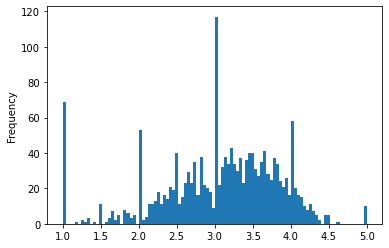

In [22]:
avg_ratings['average_rating'].plot(bins=100, kind='hist') 

<AxesSubplot:ylabel='Frequency'>

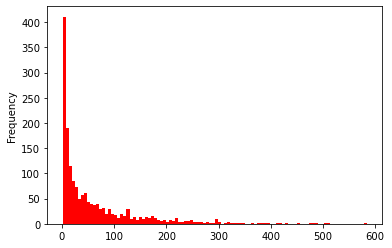

In [23]:
avg_ratings['total_reviews'].plot(bins=100, kind='hist', color = 'r') 

In [24]:
#list the highest rated movies
avg_ratings[avg_ratings['average_rating'] == 5]

,total_reviews,average_rating
title,,
Aiqing wansui (1994),1.0,5.0
Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
"Great Day in Harlem, A (1994)",1.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
Prefontaine (1997),3.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0
Santa with Muscles (1996),2.0,5.0
Someone Else's America (1995),1.0,5.0
Star Kid (1997),3.0,5.0


### One important thing to notice here is that the total number of reviews for these movies are barely any. Such ratins are not helpful for us, I will ignore such movies with low ratings are seen later on

In [25]:
#list the movies that have most number of ratings recieved 
avg_ratings.sort_values('total_reviews', ascending = False).head(100)

,total_reviews,average_rating
title,,
Star Wars (1977),584.0,4.359589
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
...,...,...
Aladdin (1992),219.0,3.812785
Babe (1995),219.0,3.995434
Volcano (1997),219.0,2.808219


# 3. Item-Based Collaborative Filtering

### To perform item-based collaborative filtering, I create a 2D matrix which contains reviews of each user for each movies. This way we can find items (movies) which are similar after analzying this matrix.

In [26]:
ratings_matrix = ratings.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [27]:
ratings_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Lets find similar movoes to The Wizard of Oz (1939)

In [28]:
wizard_of_oz = ratings_matrix['Wizard of Oz, The (1939)']

In [29]:
wizard_of_oz

user_id
0      NaN
1      4.0
2      NaN
3      NaN
4      NaN
      ... 
939    NaN
940    NaN
941    NaN
942    NaN
943    3.0
Name: Wizard of Oz, The (1939), Length: 944, dtype: float64

### Now, calcuate the similarity score of all movies with this movie rating that we have stored in wizard_of_oz

In [30]:
similarity_scores = pd.DataFrame(ratings_matrix.corrwith(wizard_of_oz), columns=['Similarity'])
similarity_scores = similarity_scores.join(avg_ratings['total_reviews'])

/Users/vraj/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/vraj/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
similarity_scores

,Similarity,total_reviews
title,,
'Til There Was You (1997),-0.132453,9.0
1-900 (1994),-1.000000,5.0
101 Dalmatians (1996),0.366592,109.0
12 Angry Men (1957),0.165508,125.0
187 (1997),0.741480,41.0
...,...,...
Young Guns II (1990),0.173557,44.0
"Young Poisoner's Handbook, The (1995)",0.558581,41.0
Zeus and Roxanne (1997),1.000000,6.0


In [32]:
similarity_scores.dropna(inplace=True)
similarity_scores

,Similarity,total_reviews
title,,
'Til There Was You (1997),-0.132453,9.0
1-900 (1994),-1.000000,5.0
101 Dalmatians (1996),0.366592,109.0
12 Angry Men (1957),0.165508,125.0
187 (1997),0.741480,41.0
...,...,...
Young Guns (1988),0.199910,101.0
Young Guns II (1990),0.173557,44.0
"Young Poisoner's Handbook, The (1995)",0.558581,41.0


In [33]:
#sort by highest to lowest similarity
similarity_scores.sort_values('Similarity', ascending=False)

,Similarity,total_reviews
title,,
Dream With the Fishes (1997),1.0,7.0
Unhook the Stars (1996),1.0,10.0
Love and a .45 (1994),1.0,8.0
"Thin Line Between Love and Hate, A (1996)",1.0,12.0
Bliss (1997),1.0,7.0
...,...,...
"Hunted, The (1995)",-1.0,3.0
Love and Death on Long Island (1997),-1.0,2.0
North (1994),-1.0,7.0


In [34]:
similarity_scores[similarity_scores['total_reviews']>80].sort_values('Similarity',ascending=False).head()

,Similarity,total_reviews
title,,
"Wizard of Oz, The (1939)",1.000000,246.0
James and the Giant Peach (1996),0.519491,126.0
"African Queen, The (1951)",0.508389,152.0
From Dusk Till Dawn (1996),0.507230,92.0
"Client, The (1994)",0.500539,97.0


### If you search for the summaries of these movies and the genres, you will realize how nicely has our Item-Based Movie recommender given suggestions

# 4. Perform Item-Based Collaborative Filtering on the entire movie list

In [35]:
ratings_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calcuating similarity scores (correlations) for all movies

In [36]:
similarity_scores = ratings_matrix.corr(method = 'pearson', min_periods = 80)

In [37]:
similarity_scores

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## You can use this similarity_score matrix now to find similar movies and give recommendations to anyone based on the movies and ratings they have given

## I created one such csv of a dummy user having 3 movies they watched and respective rating they gave. I will use the recommender system I developed above to give out movie recommendations to this user

In [38]:
user_ratings = pd.read_csv("user_sample_ratings.csv")

In [39]:
user_ratings

,Movie Name,Rating
0,Pretty Woman (1990),4
1,Star Wars (1977),5
2,Indiana Jones and the Last Crusade (1989),1
3,Forrest Gump (1994),4
4,Toy Story (1995),1


### Now, to find similar movies to each of these movies- I can do what I did before which is find the similarity scores of all the movies for each of the movies this user_ratings list. However, an additional important detail over here is star rating that the user gives. Our recommender should be able to consider the ratings a user gives to certain movies in order to learn if the user likes these kind of movies or not. Each rating given by the user needs to have a weightage in the final similarty prediction. In order to incorporate this detail, I use a lambda function and multiple the similarity scores with the rating given by the user. This way, a movie rated higher by the user will have higher similarity scores with other moives and vice versa for a low rated movie given by the user.

In [40]:
similar_movies_list = pd.Series()
for i in range(0, len(user_ratings.index)):
    similar_movie = similarity_scores[user_ratings['Movie Name'][i]].dropna()
    similar_movie = similar_movie.map(lambda x: x * user_ratings['Rating'][i]) #scale the similarity by rating that the user gave
    similar_movies_list = similar_movies_list.append(similar_movie)

/var/folders/mq/jqnhvg412jzds0msm1r0mkmc0000gn/T/ipykernel_4519/1178996148.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  similar_movies_list = pd.Series()


### Display 30 recommended movies to this user

In [41]:
similar_movies_list.sort_values(inplace = True, ascending = False)
print (similar_movies_list.head(30))

Star Wars (1977)                                      5.000000
Pretty Woman (1990)                                   4.000000
Forrest Gump (1994)                                   4.000000
Empire Strikes Back, The (1980)                       3.741763
Return of the Jedi (1983)                             3.362779
Raiders of the Lost Ark (1981)                        2.680586
Top Gun (1986)                                        2.458577
Ghost (1990)                                          2.350937
While You Were Sleeping (1995)                        2.268947
Firm, The (1993)                                      2.214995
Speed (1994)                                          2.188485
Back to the Future (1985)                             2.140960
True Lies (1994)                                      2.112395
Braveheart (1995)                                     1.976647
Field of Dreams (1989)                                1.945798
American President, The (1995)                        1